So I need to read in .csv of GI50, SMILES total including 6 SERDs at various clinical trial stages (pos control). First, the GI50 data columns can be dropped. These include RELEASE_DATE,EXPID,PREFIX,CONCENTRATION_UNIT, PANEL_NUMBER,CELL_NUMBER,PANEL_NAME,PANEL_CODE,STDDEV. 
I will keep: NSC, CELL_NAME, LOG_HI_CONCENTRATION, CONCENTRATION, COUNT, AVERAGE, EXPID.

actually done first- merge SMILES and GI50 on NSC. Then I will group by MCF7 and T-47D (luminal_like). and another groupby = MDA-MB-231/ATCC, MDA-MB-435, MDA-MB-468, HS 578T, BT-549 (tnbc_like).
 
NOTE RE: FUTURE WORK- Then I can subset the NA for GI50 values and set those aside for external test set along with all confidential vadim compounds oneconc data which will also include a few SERDs at various clinical trial stages (pos control) and those SMILES + NSC are in nsc_smiles.csv

In [1]:
import os
import pandas as pd 
import numpy as np                                

In [2]:
#set paths and files as variables
root_path = "/Users/Jackie/Desktop/NCI_screen/nci_screen_csv"
filenames = ["GI50.csv", "nsc_smiles.csv"] 

gi50_smiles_dfs: list[pd.DataFrame]  = []

for filename in filenames:
    file_path = os.path.join(root_path, filename)
    df = pd.read_csv(file_path, header=0)
    gi50_smiles_dfs.append(df)

In [3]:
gi50_smiles_dfs[1].head()
smiles = gi50_smiles_dfs[1]

#define cols to merge on
merge_cols = ["NSC"] 

# Merge the dataframes using an outer join
merged_df = gi50_smiles_dfs[0].merge(smiles, how="outer", on=merge_cols)

merged_df.head()

,RELEASE_DATE,EXPID,PREFIX,NSC,CONCENTRATION_UNIT,LOG_HI_CONCENTRATION,PANEL_NUMBER,CELL_NUMBER,PANEL_NAME,CELL_NAME,PANEL_CODE,COUNT,AVERAGE,STDDEV,SMILES
0,20210223.0,0807NS58,S,1,M,-4.0,1.0,13.0,Non-Small Cell Lung Cancer,NCI-H226,LNS,1.0,-4.6914,0.0,CC1=CC(=O)C=CC1=O
1,20210223.0,0807NS58,S,1,M,-4.0,1.0,17.0,Non-Small Cell Lung Cancer,NCI-H322M,LNS,1.0,-4.0000,0.0,CC1=CC(=O)C=CC1=O
2,20210223.0,0807NS58,S,1,M,-4.0,10.0,1.0,Melanoma,LOX IMVI,MEL,1.0,-4.7460,0.0,CC1=CC(=O)C=CC1=O
3,20210223.0,0807NS58,S,1,M,-4.0,11.0,3.0,Prostate Cancer,DU-145,PRO,1.0,-4.7621,0.0,CC1=CC(=O)C=CC1=O
4,20210223.0,0807NS58,S,1,M,-4.0,4.0,10.0,Colon Cancer,COLO 205,COL,1.0,-4.8719,0.0,CC1=CC(=O)C=CC1=O


In [4]:
#drop coldata that I don't need
lose_cols = ['RELEASE_DATE', 'PREFIX', 'CONCENTRATION_UNIT', 'LOG_HI_CONCENTRATION', 'PANEL_NUMBER', 
             'CELL_NUMBER', 'PANEL_NAME', 'PANEL_CODE', 'COUNT', "STDDEV"]

merged_df = merged_df.drop(columns=lose_cols)

# Display the DataFrame after removing the columns
print(merged_df.head())

      EXPID  NSC  CELL_NAME  AVERAGE             SMILES
0  0807NS58    1   NCI-H226  -4.6914  CC1=CC(=O)C=CC1=O
1  0807NS58    1  NCI-H322M  -4.0000  CC1=CC(=O)C=CC1=O
2  0807NS58    1   LOX IMVI  -4.7460  CC1=CC(=O)C=CC1=O
3  0807NS58    1     DU-145  -4.7621  CC1=CC(=O)C=CC1=O
4  0807NS58    1   COLO 205  -4.8719  CC1=CC(=O)C=CC1=O


In [5]:
#group luminal-like breast cancer cell data and group tnbc data in 2 dfs. keep one other df with all breast cancer cell lines
luminal_group = ['MCF7', 'T-47D']
tnbc_group = ['MDA-MB-231/ATCC', 'MDA-MB-468', 'HS 578T', 'BT-549']
all_group = ['Breast Cancer']

luminal_df = merged_df[merged_df['CELL_NAME'].isin(luminal_group)]
tnbc_df = merged_df[merged_df['CELL_NAME'].isin(tnbc_group)]

#luminal_df['AVERAGE'] = np.log(np.abs(luminal_df['AVERAGE']))
#tnbc_df['AVERAGE'] = np.log(np.abs(tnbc_df['AVERAGE']))

print("Luminal Group:")
print(luminal_df)

print("TNBC group:")
print(tnbc_df)

Luminal Group:
            EXPID     NSC CELL_NAME  AVERAGE  \
45       0807NS58       1      MCF7  -4.8338   
57       0807NS58       1     T-47D  -4.9230   
78       0810RS52       1     T-47D  -5.6815   
102      0809RS22       1      MCF7  -4.7614   
116      0809RS22       1     T-47D  -5.5957   
...           ...     ...       ...      ...   
4951374  2310NS86  849221      MCF7  -6.6222   
4951403  2312RS13  849221      MCF7  -6.7768   
4951417  2312RS13  849221     T-47D  -7.2008   
4951476  2310NS86  849222     T-47D  -5.6399   
4951481  2310NS86  849222      MCF7  -5.4886   

                                                   SMILES  
45                                      CC1=CC(=O)C=CC1=O  
57                                      CC1=CC(=O)C=CC1=O  
78                                      CC1=CC(=O)C=CC1=O  
102                                     CC1=CC(=O)C=CC1=O  
116                                     CC1=CC(=O)C=CC1=O  
...                                             

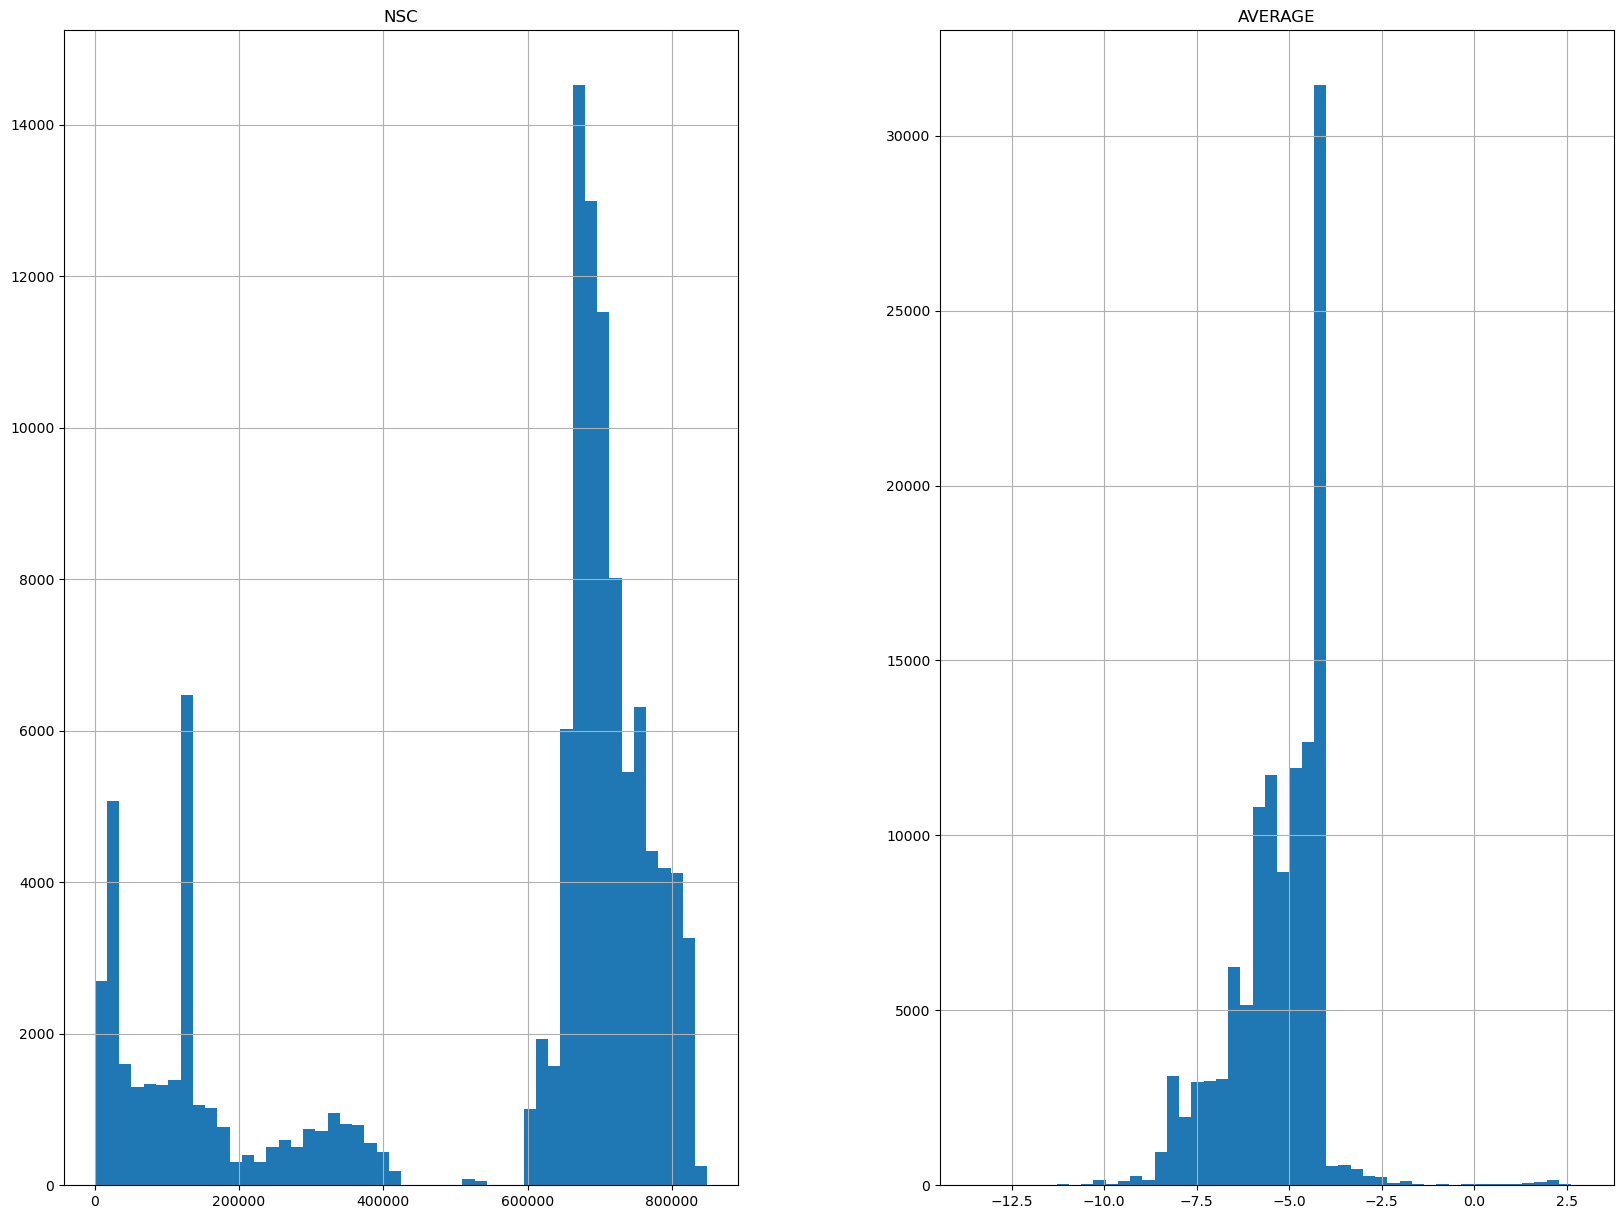

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

luminal_df.hist(bins=50, figsize=(20,15))
plt.show()

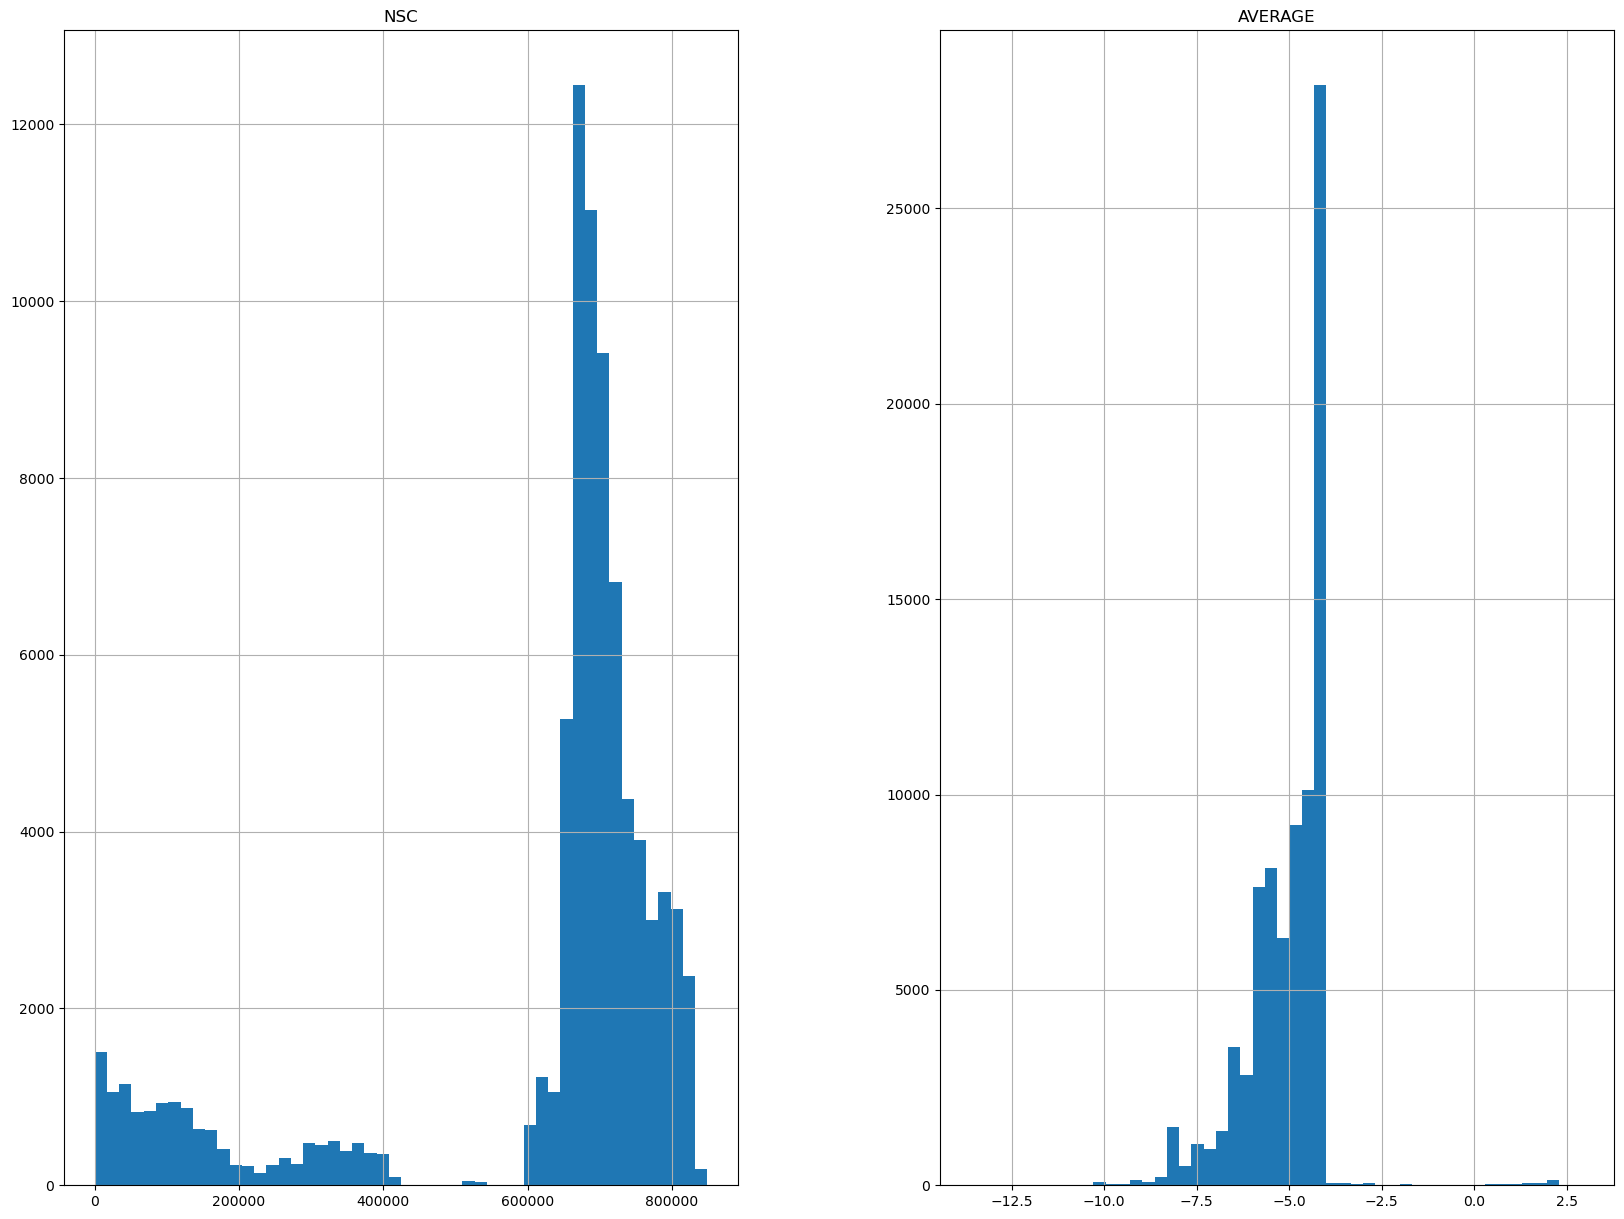

In [23]:
idx = luminal_df.groupby(['NSC', 'CELL_NAME'])['AVERAGE'].idxmin()

luminal_unique = luminal_df.loc[idx]

luminal_unique.hist(bins=50, figsize=(20,15))
plt.show()

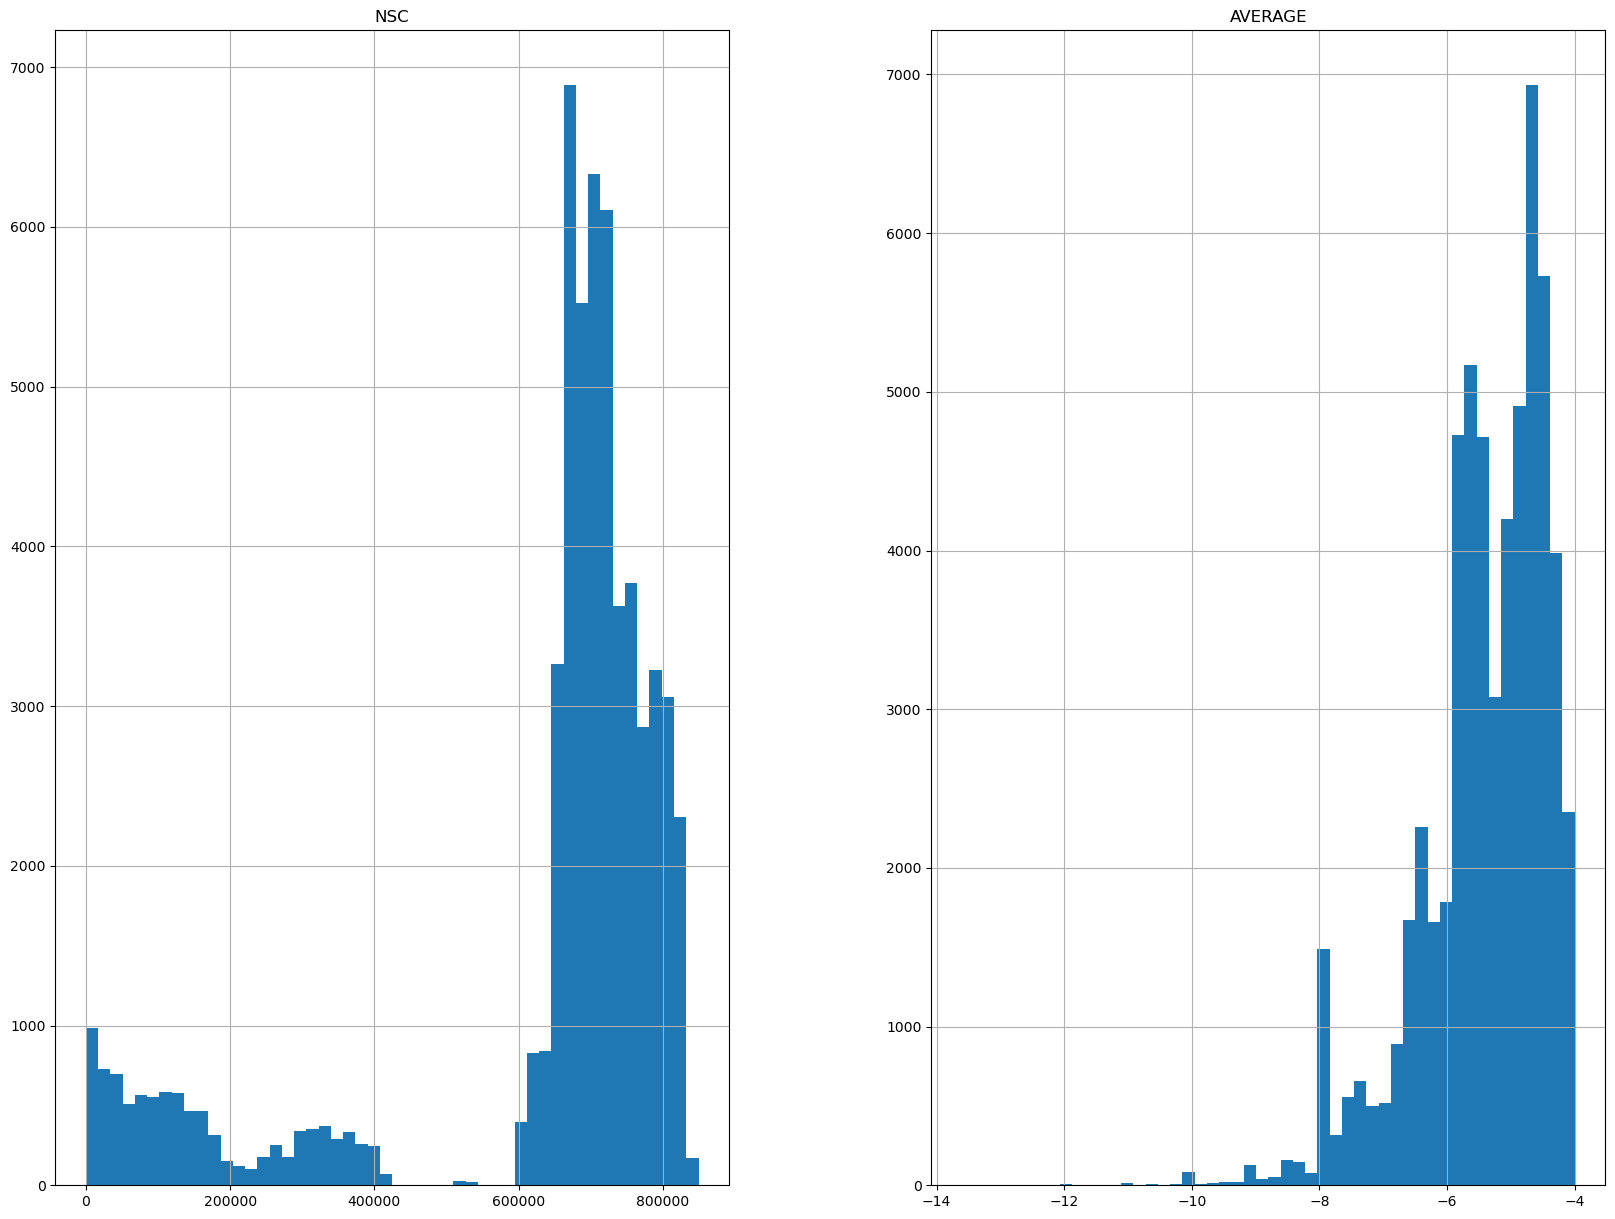

In [35]:
luminal_nodefault = luminal_unique[luminal_unique['AVERAGE'] < -4]
luminal_nodefault.hist(bins=50, figsize=(20,15))
plt.show()
print(luminal_nodefault)

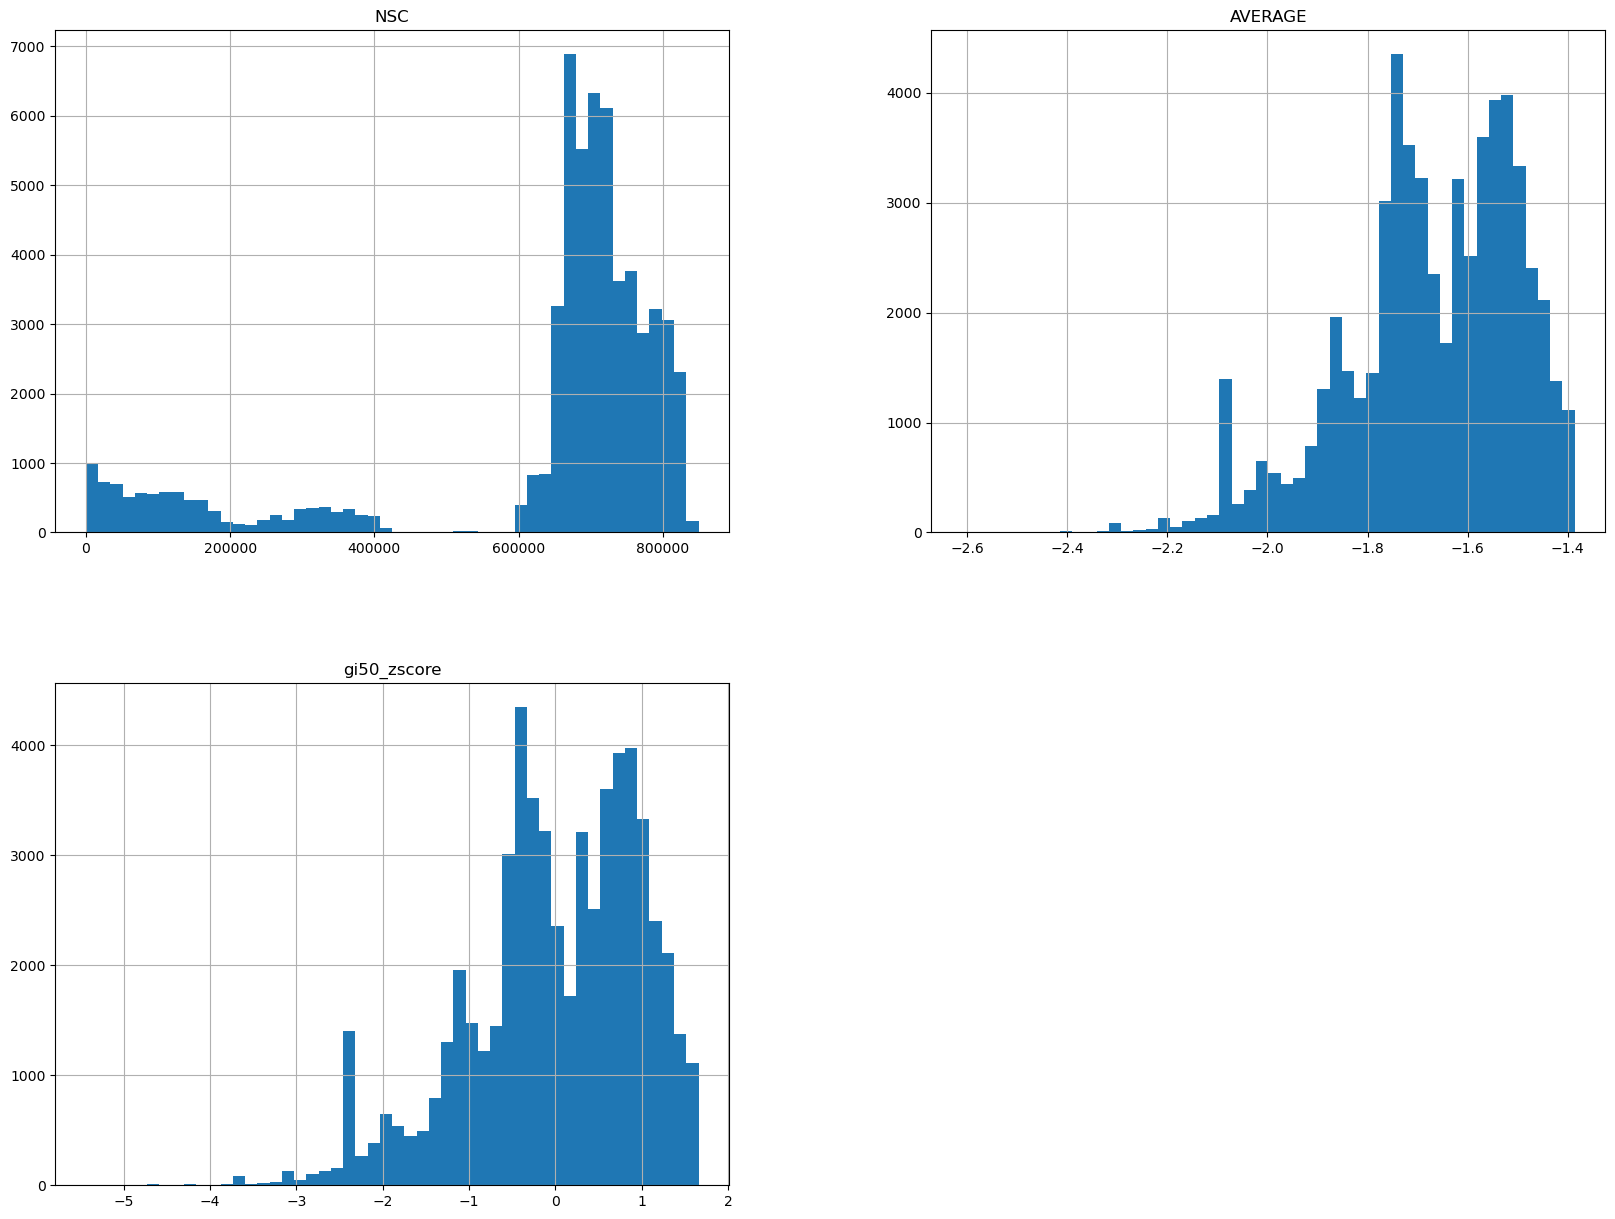

In [43]:
luminal_nlog = luminal_nodefault.copy()
luminal_nlog['AVERAGE'] = luminal_nlog['AVERAGE'].abs()
luminal_nlog['AVERAGE'] = -np.log(luminal_nlog['AVERAGE'])

#calc z sscore
mean = luminal_nlog['AVERAGE'].mean()
std_dev = luminal_nlog['AVERAGE'].std()

luminal_nlog['gi50_zscore'] = (luminal_nlog['AVERAGE'] - mean) / std_dev

luminal_nlog.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
missing_values = luminal_nlog.isnull().sum()
print(missing_values)

EXPID            0
NSC              0
CELL_NAME        0
AVERAGE          0
SMILES         129
gi50_zscore      0
dtype: int64


For the sake of time, I am going to remove all of the Nan and 0 value rows from the dataset but someone else could clean this up better. for instance, one could inpute the GI50 0's to lowest GI50 value and include back in dataset.

In [52]:
#remove Nas from SMILES and assign to new dataframe for test set ~129
smiles_na = luminal_nlog[luminal_nlog['AVERAGE'].isna()]

#remove rows from learning set
luminal_clean = luminal_nlog.dropna(subset=['AVERAGE'])
print(luminal_clean)

csv_file_path = 'nci_luminal_breast_cancer_dataset_forprepro.csv'
luminal_clean.to_csv(csv_file_path, index=False)

            EXPID     NSC CELL_NAME   AVERAGE  \
155      0810RS52       1      MCF7 -1.581861   
78       0810RS52       1     T-47D -1.737215   
219      0904NS01      17      MCF7 -1.645037   
206      0904NS01      17     T-47D -2.000601   
386      1006NS68      26      MCF7 -1.604425   
...           ...     ...       ...       ...   
4951278  2309RS71  846147     T-47D -1.742622   
4951403  2312RS13  849221      MCF7 -1.913505   
4951366  2310NS86  849221     T-47D -1.981842   
4951481  2310NS86  849222      MCF7 -1.702673   
4951476  2310NS86  849222     T-47D -1.729866   

                                                    SMILES  gi50_zscore  
155                                      CC1=CC(=O)C=CC1=O     0.525405  
78                                       CC1=CC(=O)C=CC1=O    -0.375363  
219                            CCCCCCCCCCCCCCCc1cc(O)ccc1N     0.159103  
206                            CCCCCCCCCCCCCCCc1cc(O)ccc1N    -1.902515  
386                       ICCC(c1ccccc1)(

In [53]:
luminal_clean.rename(columns={'SMILES': 'smiles'}, inplace=True)
print(luminal_clean)

            EXPID     NSC CELL_NAME   AVERAGE  \
155      0810RS52       1      MCF7 -1.581861   
78       0810RS52       1     T-47D -1.737215   
219      0904NS01      17      MCF7 -1.645037   
206      0904NS01      17     T-47D -2.000601   
386      1006NS68      26      MCF7 -1.604425   
...           ...     ...       ...       ...   
4951278  2309RS71  846147     T-47D -1.742622   
4951403  2312RS13  849221      MCF7 -1.913505   
4951366  2310NS86  849221     T-47D -1.981842   
4951481  2310NS86  849222      MCF7 -1.702673   
4951476  2310NS86  849222     T-47D -1.729866   

                                                    smiles  gi50_zscore  
155                                      CC1=CC(=O)C=CC1=O     0.525405  
78                                       CC1=CC(=O)C=CC1=O    -0.375363  
219                            CCCCCCCCCCCCCCCc1cc(O)ccc1N     0.159103  
206                            CCCCCCCCCCCCCCCc1cc(O)ccc1N    -1.902515  
386                       ICCC(c1ccccc1)(

In [54]:
import json
with open(r"C:\Users\Jackie\Desktop\NCI_screen\nci_screen_csv\model.json", "r") as f:
    model = json.load(f)
    result_smiles_col = (
        model["structure_col"] if model["structure_type"] == "smiles" else "SMILES"
    )
    result_mol_col = (
        model["structure_col"] if model["structure_type"] == "mol" else "ROMol"
    )

In [56]:
from eclean_components import dataframe_cleanup
from eclean_components import chem_cleanup

# get unique smile strings from df
unique_smiles = luminal_clean.smiles.unique().tolist()

unique_moles = {
    smile: dataframe_cleanup._molFromSmiles(smile) for smile in unique_smiles
}
# make dictionary with keys as orig smile strs and values are canonical smiles
canonical_smiles = {
    smile: dataframe_cleanup._molToSmiles(mol) for smile, mol in unique_moles.items()
}

# make new column of mol objects
luminal_clean.loc[:, result_mol_col] = luminal_clean["smiles"].apply(lambda x: unique_moles[x])
# replace smiles with canonical smiles by applying dictionary lookup to whole column
luminal_clean.loc[:, result_smiles_col] = luminal_clean["smiles"].apply(lambda x: canonical_smiles[x])

[15:19:55] SMILES Parse Error: syntax error while parsing: [R][Hg]OC(=O)C.c1ccc2c(c1)ccc3ccccc23
[15:19:55] SMILES Parse Error: Failed parsing SMILES '[R][Hg]OC(=O)C.c1ccc2c(c1)ccc3ccccc23' for input: '[R][Hg]OC(=O)C.c1ccc2c(c1)ccc3ccccc23'
[15:19:55] SMILES Parse Error: syntax error while parsing: c1ccc2c(c1)[i+]c3ccccc23
[15:19:55] SMILES Parse Error: Failed parsing SMILES 'c1ccc2c(c1)[i+]c3ccccc23' for input: 'c1ccc2c(c1)[i+]c3ccccc23'
[15:19:55] Explicit valence for atom # 24 Cl, 3, is greater than permitted
[15:19:55] SMILES Parse Error: syntax error while parsing: [R]C(C)C.[R]C(C)C.[R]C(C)CC.[R]C1NC(=O)C(NC(=O)c2ccc(C)c3OC4=C(C)C(=O)C(=C(C(=O)NC5C(C)OC(=O)C(C(C)C)N(C)C(=O)CN(C)C(=O)C6CCCN6C(=O)C(NC5=O)[R1])C4=Nc23)N)C(C)OC(=O)C(C(C)C)N(C)C(=O)CN(C)C(=O)C7CCCN7C1=O.CCC(C)[R1].CCC(C)[R1].CC(C)[R1]
[15:19:55] SMILES Parse Error: Failed parsing SMILES '[R]C(C)C.[R]C(C)C.[R]C(C)CC.[R]C1NC(=O)C(NC(=O)c2ccc(C)c3OC4=C(C)C(=O)C(=C(C(=O)NC5C(C)OC(=O)C(C(C)C)N(C)C(=O)CN(C)C(=O)C6CCCN6C(=O)C

Exception: SMILES nan could not be parsed


[15:19:56] SMILES Parse Error: syntax error while parsing: [R]OC1CCC2(C=O)C(CCC3C2CCC4(C)C(CCC34O)C5=CC(=O)OC5)C1
[15:19:56] SMILES Parse Error: Failed parsing SMILES '[R]OC1CCC2(C=O)C(CCC3C2CCC4(C)C(CCC34O)C5=CC(=O)OC5)C1' for input: '[R]OC1CCC2(C=O)C(CCC3C2CCC4(C)C(CCC34O)C5=CC(=O)OC5)C1'
[15:19:56] SMILES Parse Error: syntax error while parsing: [R]N.[R]Cl.[R]OC.c1ccc2c(c1)ccc3ccccc23
[15:19:56] SMILES Parse Error: Failed parsing SMILES '[R]N.[R]Cl.[R]OC.c1ccc2c(c1)ccc3ccccc23' for input: '[R]N.[R]Cl.[R]OC.c1ccc2c(c1)ccc3ccccc23'
[15:19:56] SMILES Parse Error: syntax error while parsing: [Fe+2].[R]c1ccccc1.[R]c2ccccc2.C[N+](C)(C)C.[RH].[RH]
[15:19:56] SMILES Parse Error: Failed parsing SMILES '[Fe+2].[R]c1ccccc1.[R]c2ccccc2.C[N+](C)(C)C.[RH].[RH]' for input: '[Fe+2].[R]c1ccccc1.[R]c2ccccc2.C[N+](C)(C)C.[RH].[RH]'
[15:19:56] SMILES Parse Error: syntax error while parsing: [R]C(=O)NC1C(C)OC(=O)C(C(C)C)N(C)C(=O)CN(C)C(=O)C2CCCN2C(=O)C(NC1=O)C(C)C.[R]C(=O)NC3C(C)OC(=O)C(C(C)C)N(C)C(=O)C

Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: Mol to SMILES conversion failed
Exception: 

In [57]:
cleaned = chem_cleanup._remove_fragments(
    luminal_clean,
    result_smiles_col,
    result_mol_col,
    False,
    None
)

cleaned.head()

Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be parsed
Exception: SMILES nan could not be

,EXPID,NSC,CELL_NAME,AVERAGE,smiles,gi50_zscore,ROMol,Smiles
155,0810RS52,1,MCF7,-1.581861,CC1=CC(=O)C=CC1=O,0.525405,<rdkit.Chem.rdchem.Mol object at 0x00000156B7A...,CC1=CC(=O)C=CC1=O
78,0810RS52,1,T-47D,-1.737215,CC1=CC(=O)C=CC1=O,-0.375363,<rdkit.Chem.rdchem.Mol object at 0x00000156B7A...,CC1=CC(=O)C=CC1=O
219,0904NS01,17,MCF7,-1.645037,CCCCCCCCCCCCCCCc1cc(O)ccc1N,0.159103,<rdkit.Chem.rdchem.Mol object at 0x00000156B7A...,CCCCCCCCCCCCCCCc1cc(O)ccc1N
206,0904NS01,17,T-47D,-2.000601,CCCCCCCCCCCCCCCc1cc(O)ccc1N,-1.902515,<rdkit.Chem.rdchem.Mol object at 0x00000156B7A...,CCCCCCCCCCCCCCCc1cc(O)ccc1N
386,1006NS68,26,MCF7,-1.604425,ICCC(c1ccccc1)(c2ccccc2)c3ccccc3,0.394574,<rdkit.Chem.rdchem.Mol object at 0x00000156B7A...,ICCC(c1ccccc1)(c1ccccc1)c1ccccc1


In [141]:
cleaned.to_csv('nci_cleanedSMILES_gi500zscore.csv')

In [103]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
#from MegaModels.models import create_model

In [140]:
print(cleaned.columns)

Index(['EXPID', 'NSC', 'CELL_NAME', 'AVERAGE', 'smiles', 'gi50_zscore',
       'ROMol', 'Smiles'],
      dtype='object')


In [115]:
  # identifying the SMILES and Y-value columns
structure_col = 'Smiles'
output_col = 'gi50_zscore'

    # fps/model parameters/datasets
radius = 3
nbits = 1024
model_type = 'rfr'
    #dataset_filepath = './example_datasets/example_dataset.csv'

generator = GetMorganGenerator(radius=radius, fpSize=nbits)

    # create the X, Y data
x_data = [generator.GetFingerprint(Chem.MolFromSmiles(x)) for x in structure_col]
y_data = np.array(cleaned[output_col])

[20:02:10] SMILES Parse Error: syntax error while parsing: m
[20:02:10] SMILES Parse Error: Failed parsing SMILES 'm' for input: 'm'


ArgumentError: Python argument types in
    FingeprintGenerator64.GetFingerprint(FingeprintGenerator64, NoneType)
did not match C++ signature:
    GetFingerprint(class RDKit::FingerprintGenerator<unsigned __int64> const * __ptr64 self, class RDKit::ROMol mol, class boost::python::api::object fromAtoms=[], class boost::python::api::object ignoreAtoms=[], int confId=-1, class boost::python::api::object customAtomInvariants=[], class boost::python::api::object customBondInvariants=[], class boost::python::api::object additionalOutput=None)

In [116]:
generator = GetMorganGenerator(radius=radius, fpSize=nbits)

In [129]:
structure_col = 'Smiles'
output_col = 'gi50_zscore'

# Verify the column exists before the loop
if structure_col in cleaned.columns and output_col in cleaned.columns:
    radius = 3
    nbits = 1024
    
    # Create a Morgan fingerprint generator
    generator = GetMorganGenerator(radius=radius, fpSize=nbits)
    
    # Initialize lists for valid SMILES and corresponding fingerprints
    valid_smiles = []
    x_data = []
    
    for index, smile in cleaned[structure_col].dropna().astype(str).items():
        mol = Chem.MolFromSmiles(smile)
        if mol is not None:
            valid_smiles.append(index)
            fp = generator.GetFingerprint(mol)
            x_data.append(np.array(list(map(int, fp.ToBitString()))))
        else:
            print(f"Invalid SMILES: {smile}")

    # Convert x_data to a numpy array
    x_data = np.array(x_data)
    
    # Ensure y_data only contains corresponding entries for valid SMILES
    valid_indices = pd.Index(valid_smiles)
    y_data = cleaned.loc[valid_indices, output_col].to_numpy()

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [135]:
import MegaModels.MegaModels as mm
print(dir(mm))

from MegaModels.MegaModels.models import create_model

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'class_imbalance', 'errors', 'fingerprints', 'models', 'stats']


In [138]:
# create a classifier model and fit it, getting the statistics back
model_to_train = create_model(method='rfr')
cross_validation_statistics = model_to_train.fit(X_train, y_train)
print(cross_validation_statistics)

KeyboardInterrupt: 

In [145]:
len(y_data)

58377